In [1]:
#Importing packages
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(font_scale = 1.5, style = 'whitegrid')

In [2]:
#Change directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

#File path to data set
file_path = os.path.join('data', 'earthpy-downloads',
                        'rayos-paraguay','dmh', '2016','2016_01','Paraguay_pulse20160101.csv')

In [31]:
#Data set
boulder_precip_2003_2013 = pd.read_csv(file_path, parse_dates = ['timestamp'],
                                      index_col = ['timestamp'])
#First view
boulder_precip_2003_2013.index = pd.to_datetime(boulder_precip_2003_2013.index)
boulder_precip_2003_2013.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88501 entries, 2016-01-01 00:00:00.012431860 to 2016-01-01 16:23:14.728927374
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           88501 non-null  int64  
 1   latitude       88501 non-null  float64
 2   longitude      88501 non-null  float64
 3   peakcurrent    88501 non-null  int64  
 4   icheight       88501 non-null  int64  
 5   numbersensors  88501 non-null  int64  
 6   majoraxis      88501 non-null  float64
 7   minoraxis      88501 non-null  float64
 8   bearing        88501 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 6.8 MB


In [36]:
##Subsetting all december data
boulder_precip_2003_2013[boulder_precip_2003_2013.index.hour==15].loc[boulder_precip_2003_2013['type']==1]

,type,latitude,longitude,peakcurrent,icheight,numbersensors,majoraxis,minoraxis,bearing
timestamp,,,,,,,,,
2016-01-01 15:00:23.635444880,1,-20.06409,-54.35075,28830,15575,5,1.38,0.77,134.6
2016-01-01 15:00:41.127802134,1,-19.79129,-54.33772,-5611,19308,7,0.45,0.37,177.8
2016-01-01 15:00:57.924190283,1,-20.00835,-55.87480,14232,12251,10,0.42,0.19,2.4
2016-01-01 15:00:58.248089314,1,-20.00660,-55.85844,-5620,16086,6,0.84,0.69,2.6
2016-01-01 15:00:58.346285105,1,-19.99329,-55.87237,-12781,15745,7,0.95,0.91,176.9
...,...,...,...,...,...,...,...,...,...
2016-01-01 15:58:57.656249523,1,-19.56824,-56.64077,6906,19639,11,0.41,0.28,119.4
2016-01-01 15:59:02.174566746,1,-19.70968,-56.78984,13209,17313,8,0.11,0.10,130.0
2016-01-01 15:59:02.659329414,1,-19.47107,-56.55931,-13804,11392,10,0.93,0.45,167.3


KeyboardInterrupt: 

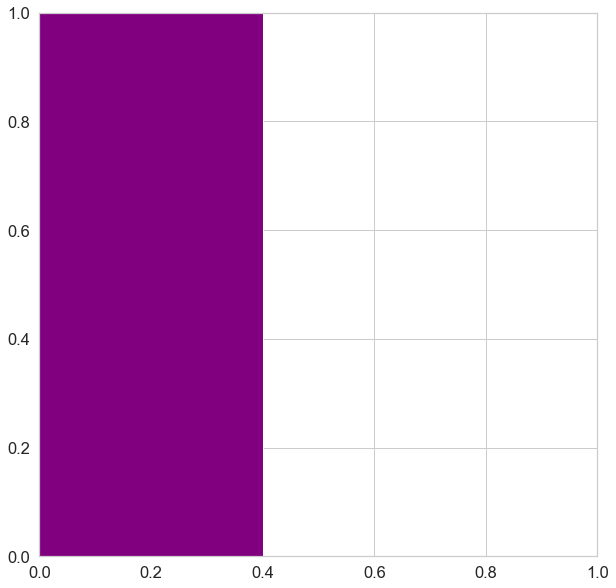

In [57]:
#Period subset aug-may 2005
precip_may_aug_2005 = boulder_precip_2003_2013[boulder_precip_2003_2013.index.hour==15].resample('ms').count()

#Plotting
f, ax = plt.subplots(figsize = (10,10))
ax.bar(precip_may_aug_2005.index.minute,
      precip_may_aug_2005['peakcurrent'],
      color = 'purple')
ax.set(xlabel='Date',
      ylabel = 'Peak current (inches)',
      title = 'Daily Total Precipitation\nMay-Aug 2005 Boulder Creek')
plt.setp(ax.get_xticklabels(), rotation = 45)
plt.show()